# Analyzing the effects of preprocessing techniques on the accuracy of a CNN for the CIFAR-100 dataset

## Prepare data

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
# obtain the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [23]:
# find out size of the dataset
(x_train.shape, x_test.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [58]:
# reshape the targets with one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

In [59]:
# normalize the dataset (not updated to RGB normalization)
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

x_train = normalize(x_train)
x_test = normalize(x_test)

## Build CNN with different combinations of preprocessing layers

In [127]:
'''
Note: the following results were obtained by commenting out either or both 
    of the preprocessing layers and running this cell and following cells
    for each combination.
'''

# create a simple CNN with preprocessing layers
cnn = tf.keras.models.Sequential([

    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    # preprocessing
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomCrop(28, 28),

    # convolutional and pooling layers
    tf.keras.layers.Conv2D(filters=28, activation='relu', kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=56, activation='relu', kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # flattening and fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [ ]:
# compile the network and display a summary
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_crop_13 (RandomCrop)  (None, 28, 28, 3)         0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1400)            

## Train the networks, recording accuracy and loss

In [114]:
history = cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 4.0686 - accuracy: 0.0806
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 3.2072 - accuracy: 0.2128
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.8892 - accuracy: 0.2727
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.6741 - accuracy: 0.3197
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 2.5388 - accuracy: 0.3470
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.4325 - accuracy: 0.3650
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3460 - accuracy: 0.3875
Epoch 8/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2597 - accuracy: 0.4050
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2028 - accuracy: 0.4196
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step -

In [115]:
# test the network and store the evaluations in a list for network comparison
evaluations = []
histories = []

evaluations.append(cnn.evaluate(x_test, y_test))
histories.append(history)

313/313 [==============================] - 2s 7ms/step - loss: 2.5026 - accuracy: 0.3914


## Plot accuracy and loss for the different networks

In [116]:
# set labels and colors
labels = ['no treatment', 'random cropping', 'random flipping', 'random cropping and flipping']
color = ['red', 'orange', 'green', 'blue']

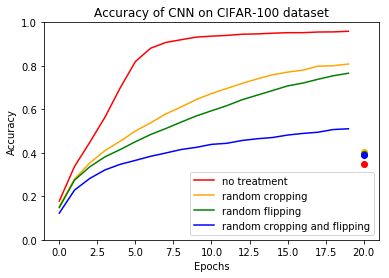

In [117]:
# plot accuracy
plt.title("Accuracy of CNN on CIFAR-100 dataset")
for i in range(len(histories)):
    plt.plot(histories[i].history['accuracy'], label=labels[i], color=color[i])
    plt.plot(20, evaluations[i][1], 'o', color=color[i])
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([-1,21,0,1])
plt.savefig('preprocessing-accuracies', dpi=200)

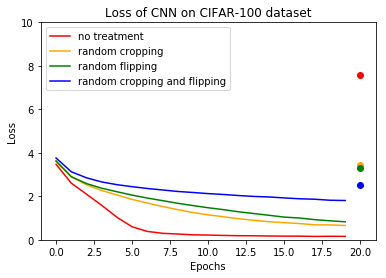

In [118]:
# plot loss
plt.title("Loss of CNN on CIFAR-100 dataset")
for i in range(len(histories)):
    plt.plot(histories[i].history['loss'], label=labels[i], color=color[i])
    plt.plot(20, evaluations[i][0], 'o', color=color[i])
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([-1,21,0,10])
plt.savefig('preprocessing-losses', dpi=200)